<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Report/BlockAE_10x1_30_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy
import time
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense,  Reshape, GaussianNoise
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical





input_block_length = 10
num_of_input_block = 1
input_message_length = input_block_length * num_of_input_block 
encoder_output_length = 30
channel_size = 10


NUM_OF_INPUT_MESSAGE = 4 * 1000
NUM_OF_INPUT_MESSAGE_TEST = 1000
SNR_STEP_SIZE = .5

train_batch_size = 1000

SNR_BEGIN = 0
SNR_END = 10

bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]


import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = (10 ** (- snr / 20))  #*(numpy.sqrt(2))
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [18]:
def conv_to_binary_from_decimal (decimal,input_message_size, input_message_length):
  binary = numpy.random.randint(1, size=(input_message_size,input_message_length))
  for i in range (input_message_size):
    bin = [int(x) for x in list('{0:0b}'.format(decimal[0][i]))]
    #print(bin)
    for j in range (len(bin)):
      offset = input_message_length - len(bin)
      #print ("x",offset)
      binary [i][j+offset] = bin [j]
  return binary

def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
  binary = numpy.random.randint(1, size=(num_of_input,num_of_block, block_size))
  for i in range (num_of_input):
      for j in range (num_of_block):
        #print ("xxx", input[i][j])
        bin = [int(x) for x in list('{0:0b}'.format(input[i][j][0]))]
        #print(bin)
        for k in range (len(bin)):
          offset = block_size - len(bin)
          #print ("x",offset)
          binary [i][j][k+offset] = bin [k]
  return binary

def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message_decimal = []
    decoded_message_decimal.append(numpy.argmax(decoded_message, axis=1))
    decoded_message_binary = conv_to_binary_from_decimal (decoded_message_decimal, num_of_input_msg,  input_message_length)
    ber,bler = GetBerBler (input_binary, decoded_message_binary)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def get_block_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_decimal, num_of_input,num_of_input_block, input_block_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:

    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)

    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)

    for i in range (num_of_input):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])

    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))

    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, num_of_input, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (input_decimal, num_of_input, num_of_input_block, input_block_length)   
    diff = abs(decoded_message_binary - input_message_binary)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    block_error = numpy.count_nonzero(diff_sum!=0)
    bit_error = numpy.sum(diff_sum)
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    bler = float(total_msg_error)/(num_of_input)
    ber = float(total_bit_error)/(num_of_input*num_of_input_block*input_block_length)
    print('SNR: {:04.3f}:-> BLER: {:03.5f} BER: {:03.5f} '.format(snr,bler,ber))
    print ("total_bit_error:", total_bit_error)
    print ("total_msg_error:", total_msg_error)
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

In [19]:
snr_std = Snr2Sigma(7.0)

print ("num_of_input_block", num_of_input_block)
print ("input_block_length", input_block_length)

input_message_x = Input(shape=(num_of_input_block, 2**input_block_length), name="inputs")
# "encoded" is the encoded representation of the input
#reshaped_input = tf.reshape (input_message_x, (tf.shape(input_message_x)[0],tf.shape(input_message_x)[1]*tf.shape(input_message_x)[2]))
reshaped_input = tf.reshape (input_message_x, (-1,num_of_input_block*2**input_block_length))
#reshaped_input =  Reshape((1,num_of_input_block*2**input_block_length))

enc_layer1 = Dense(encoder_output_length, activation='tanh', name="enc_layer1")(reshaped_input)
enc_layer2 = Dense(2*channel_size, activation='tanh', name="enc_layer2")(enc_layer1)
enc_layer3 =  enc_layer2 / tf.sqrt(tf.reduce_mean(tf.square(enc_layer2)))
encoder = Model(input_message_x, enc_layer3)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(2*channel_size,))
dec_layer1 = Dense(num_of_input_block*2**input_block_length, activation='sigmoid', name="dec_layer1")(encoded_input)
#dec_layer2 = Dense(num_of_input_block*2**input_block_length, activation="sigmoid")(dec_layer1)
reshaped_output = tf.reshape (dec_layer1, (-1,num_of_input_block,2**input_block_length))
dec_layer2 = Dense((2**input_block_length), activation="softmax", name="dec_layer2")(reshaped_output)
# this model maps an encoded input to its decoder representation
decoder = Model(encoded_input, dec_layer2)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

num_of_input_block 1
input_block_length 10
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 1, 1024)]    0                                            
__________________________________________________________________________________________________
tf.reshape_2 (TFOpLambda)       (None, 1024)         0           inputs[0][0]                     
__________________________________________________________________________________________________
enc_layer1 (Dense)              (None, 30)           30750       tf.reshape_2[0][0]               
__________________________________________________________________________________________________
enc_layer2 (Dense)              (None, 20)           620         enc_layer1[0][0]                 
_________________________________________________

In [20]:
NUM_OF_INPUT_MESSAGE = train_batch_size * 10
training_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(training_input_message)
training_input_message_one_hot = to_categorical(y=training_input_message, num_classes=2**input_block_length)
#print(training_input_message_one_hot)

test_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(test_input_message)
test_input_message_one_hot = to_categorical(y=test_input_message, num_classes=2**input_block_length)
#print(test_input_message_one_hot)


In [21]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
training_history1 = dict ()
beginTime = time.clock()

for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  history = autoencoder.fit(training_input_message_one_hot, training_input_message,
                epochs=50,
                batch_size=train_batch_size,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message))
  training_history1 [snr] = history

endTime = time.clock()
print('TotalTime: ' + str(endTime - beginTime) + ' s')

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
10/10 [==============================] - 2s 214ms/step - loss: 7.0943 - sparse_categorical_accuracy: 9.9859e-04 - val_loss: 6.9984 - val_sparse_categorical_accuracy: 0.0013
Epoch 2/50
10/10 [==============================] - 2s 199ms/step - loss: 6.8907 - sparse_categorical_accuracy: 0.0032 - val_loss: 6.8009 - val_sparse_categorical_accuracy: 0.0287
Epoch 3/50
10/10 [==============================] - 2s 198ms/step - loss: 6.7360 - sparse_categorical_accuracy: 0.0236 - val_loss: 6.6723 - val_sparse_categorical_accuracy: 0.0360
Epoch 4/50
10/10 [==============================] - 2s 198ms/step - loss: 6.5532 - sparse_categorical_accuracy: 0.0565 - val_loss: 6.5320 - val_sparse_categorical_accuracy: 0.0753
Epoch 5/50
10/10 [==============================] - 2s 198ms/step - loss: 6.4311 - sparse_categorical_accuracy: 0.0770 - val_loss: 6.3609 - val_sparse_categorical_accuracy: 0.1149
Epoch 6/50
10/10 [==============================] - 2s 199ms/s

In [22]:
print (training_history1)

{0.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bafa57160>, 0.5: <tensorflow.python.keras.callbacks.History object at 0x7f5bb5869518>, 1.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bb76a99e8>, 1.5: <tensorflow.python.keras.callbacks.History object at 0x7f5bb1fbba58>, 2.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bb76ae668>, 2.5: <tensorflow.python.keras.callbacks.History object at 0x7f5bb7726630>, 3.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bb5839d68>, 3.5: <tensorflow.python.keras.callbacks.History object at 0x7f5bb773f3c8>, 4.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bb1d500f0>, 4.5: <tensorflow.python.keras.callbacks.History object at 0x7f5baf40deb8>, 5.0: <tensorflow.python.keras.callbacks.History object at 0x7f5baf63d278>, 5.5: <tensorflow.python.keras.callbacks.History object at 0x7f5bb21f1be0>, 6.0: <tensorflow.python.keras.callbacks.History object at 0x7f5bb1684cc0>, 6.5: <tensorflow.python.

In [24]:
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
ber_batch_size = 2
ber_iteration = int(NUM_OF_INPUT_MESSAGE/ber_batch_size)
ber_iteration = 100
for snr in numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (ber_iteration):
    input_message_xx = training_input_message_one_hot [i:i+ber_batch_size]
    #print ("input", training_input_message[i:i+ber_batch_size])
    encoded_message = encoder.predict(training_input_message_one_hot[i:i+ber_batch_size])
    #print (encoded_message)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    #print (noised_message)
    #awgn_channel = GaussianNoise(sigma,input_shape=(CHANEL_SIZE,))
    #noised_message = awgn_channel.predict(encoded_message)
    #noised_message = awgn_layer (encoded_message)    
    #print(noised_message)
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))
    #print ("decoded1:", decoded_message)
    #def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, ber_batch_size, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (training_input_message [i:i+ber_batch_size], ber_batch_size, num_of_input_block, input_block_length)   
    #print ("decoded_message_binary:", decoded_message_binary)
    #print ("input_message_binary:", input_message_binary)
    diff = abs(decoded_message_binary - input_message_binary)
    #print ("diff", diff)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    #print ("diff_sum", diff_sum)
    block_error = numpy.count_nonzero(diff_sum!=0)
    #print ("block_error:", block_error)
    bit_error = numpy.sum(diff_sum)
    #print ("bit_error",bit_error )
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    #print ("total_msg_error:", total_msg_error)
    #print ("total_bit_error", total_bit_error)
    i = i + ber_batch_size
  bler = float(total_msg_error)/(ber_iteration*ber_batch_size)

  ber = float(total_bit_error)/(ber_iteration*ber_batch_size*num_of_input_block*input_block_length)
  print('SNR: {:04.3f}:\n ->BLER: {:03.5f}  BER: {:03.5f}'.format(snr,bler,ber,total_time))
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)  
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)

SNR: 0.000:
 ->BLER: 0.32500  BER: 0.15800
SNR: 0.500:
 ->BLER: 0.25500  BER: 0.12250
SNR: 1.000:
 ->BLER: 0.18000  BER: 0.09100
SNR: 1.500:
 ->BLER: 0.12000  BER: 0.06250
SNR: 2.000:
 ->BLER: 0.06500  BER: 0.03000
SNR: 2.500:
 ->BLER: 0.03000  BER: 0.01300
SNR: 3.000:
 ->BLER: 0.01500  BER: 0.00600
SNR: 3.500:
 ->BLER: 0.02500  BER: 0.01050
SNR: 4.000:
 ->BLER: 0.00000  BER: 0.00000
SNR: 4.500:
 ->BLER: 0.00000  BER: 0.00000
SNR: 5.000:
 ->BLER: 0.01000  BER: 0.00550
SNR: 5.500:
 ->BLER: 0.00000  BER: 0.00000
SNR: 6.000:
 ->BLER: 0.00000  BER: 0.00000
SNR: 6.500:
 ->BLER: 0.00000  BER: 0.00000
SNR: 7.000:
 ->BLER: 0.00000  BER: 0.00000
SNR: 7.500:
 ->BLER: 0.00000  BER: 0.00000
SNR: 8.000:
 ->BLER: 0.00000  BER: 0.00000
SNR: 8.500:
 ->BLER: 0.00000  BER: 0.00000
SNR: 9.000:
 ->BLER: 0.00000  BER: 0.00000
SNR: 9.500:
 ->BLER: 0.00000  BER: 0.00000


In [25]:
print (training_input_message_one_hot.shape)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message, 
          training_input_message_one_hot.shape[0], training_input_message_one_hot.shape[1],
          int(numpy.math.log2(training_input_message_one_hot.shape[2])),
          channel_size)
print (ber_per_iter_dl_tensor1)
print (bler_per_iter_dl_tensor1)

(10000, 1, 1024)
SNR: 0.000:-> BLER: 0.27700 BER: 0.13898 
total_bit_error: 13898
total_msg_error: 2770
SNR: 0.500:-> BLER: 0.21570 BER: 0.10739 
total_bit_error: 10739
total_msg_error: 2157
SNR: 1.000:-> BLER: 0.15890 BER: 0.07924 
total_bit_error: 7924
total_msg_error: 1589
SNR: 1.500:-> BLER: 0.11150 BER: 0.05589 
total_bit_error: 5589
total_msg_error: 1115
SNR: 2.000:-> BLER: 0.07200 BER: 0.03596 
total_bit_error: 3596
total_msg_error: 720
SNR: 2.500:-> BLER: 0.04400 BER: 0.02181 
total_bit_error: 2181
total_msg_error: 440
SNR: 3.000:-> BLER: 0.02520 BER: 0.01293 
total_bit_error: 1293
total_msg_error: 252
SNR: 3.500:-> BLER: 0.01510 BER: 0.00738 
total_bit_error: 738
total_msg_error: 151
SNR: 4.000:-> BLER: 0.00780 BER: 0.00369 
total_bit_error: 369
total_msg_error: 78
SNR: 4.500:-> BLER: 0.00210 BER: 0.00096 
total_bit_error: 96
total_msg_error: 21
SNR: 5.000:-> BLER: 0.00140 BER: 0.00074 
total_bit_error: 74
total_msg_error: 14
SNR: 5.500:-> BLER: 0.00030 BER: 0.00011 
total_bit

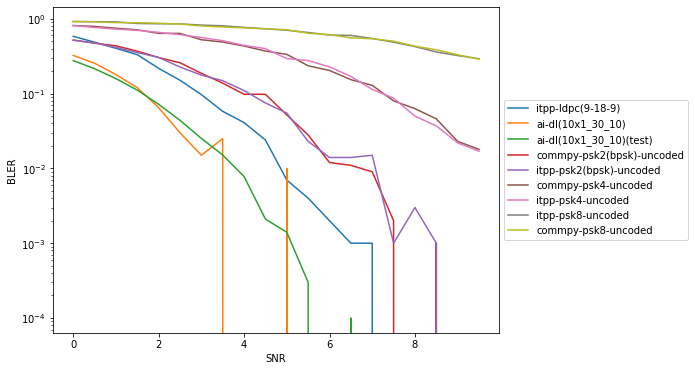

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(10x1_30_10)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(10x1_30_10)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


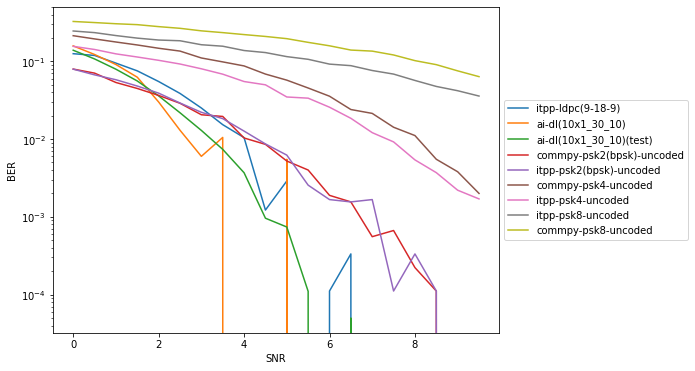

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(10x1_30_10)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(10x1_30_10)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

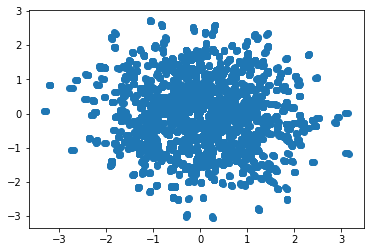

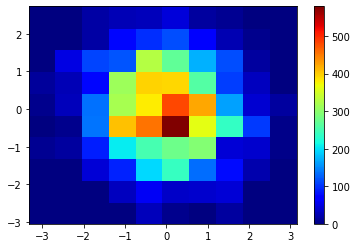

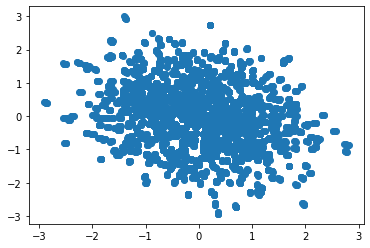

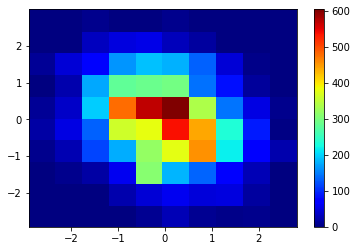

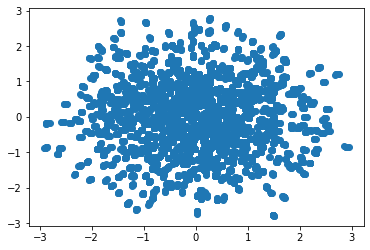

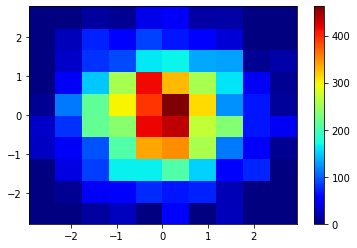

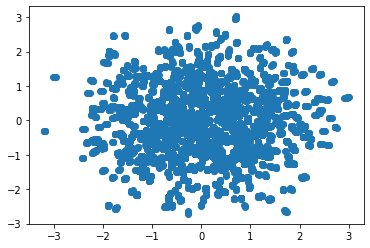

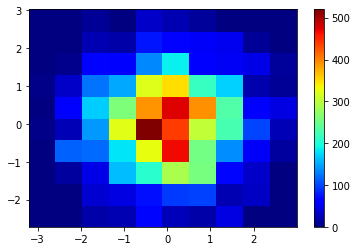

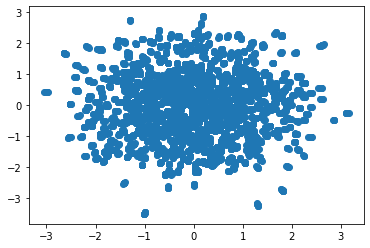

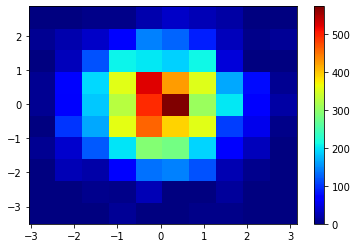

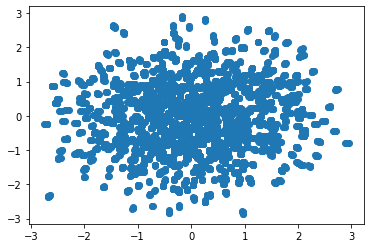

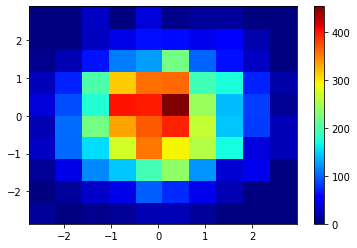

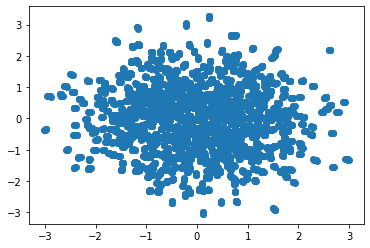

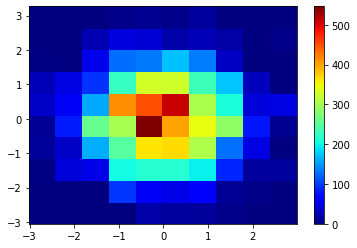

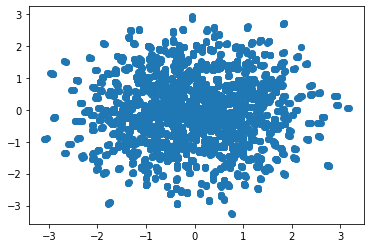

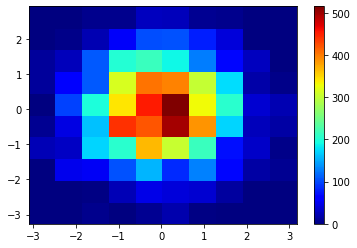

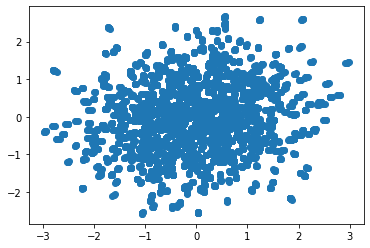

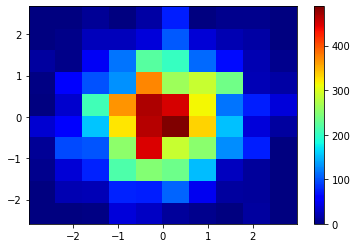

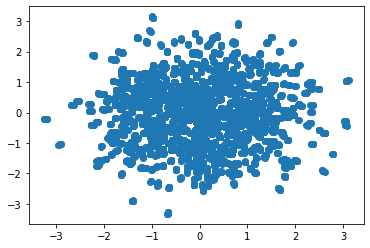

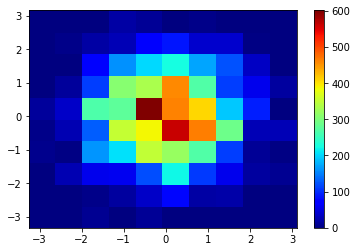

In [33]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

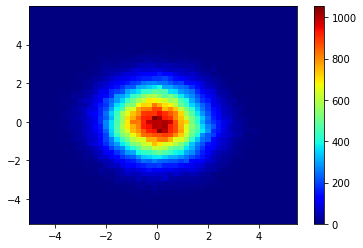

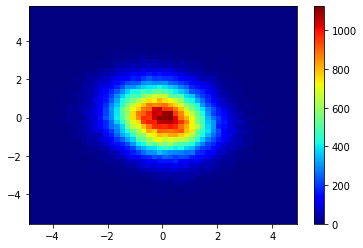

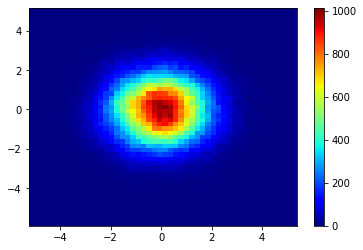

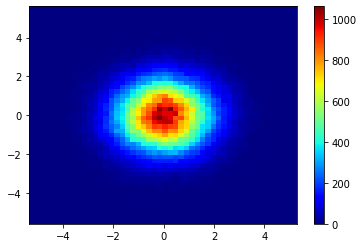

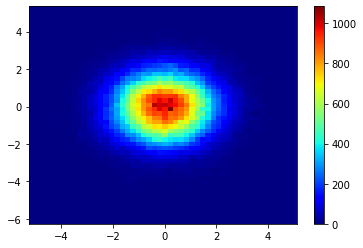

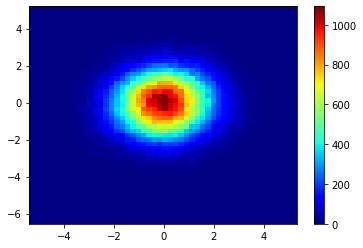

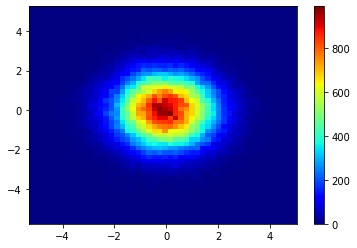

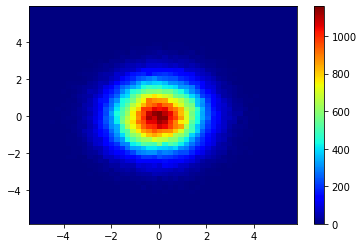

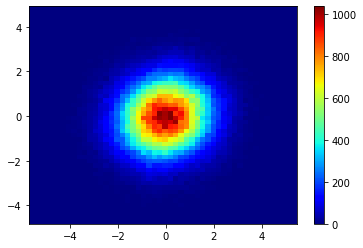

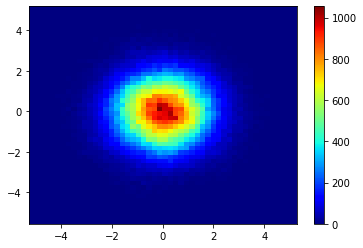

In [34]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

Text(0, 0.5, 'Loss')

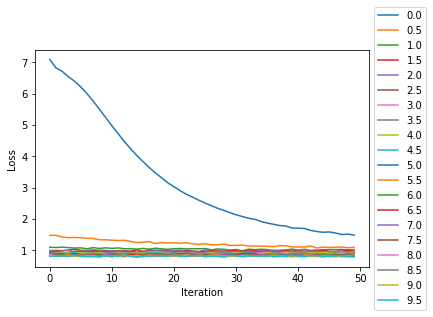

In [35]:
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Iteration')
plt.ylabel('Loss')

4.4694304


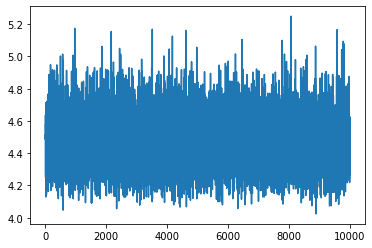

In [36]:
encoded_message = encoder.predict(training_input_message_one_hot)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))

In [37]:
test_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE_TEST,num_of_input_block,1))
#print(test_input_message)
test_input_message_one_hot = to_categorical(y=test_input_message, num_classes=2**input_block_length)
#print(test_input_message_one_hot)


In [38]:
print (training_input_message_one_hot.shape)
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message, 
          test_input_message_one_hot.shape[0], training_input_message_one_hot.shape[1],
          int(numpy.math.log2(test_input_message_one_hot.shape[2])),
          channel_size)
print (ber_per_iter_dl_tensor2)
print (bler_per_iter_dl_tensor2)

(10000, 1, 1024)
SNR: 0.000:-> BLER: 0.30600 BER: 0.14970 
total_bit_error: 1497
total_msg_error: 306
SNR: 0.500:-> BLER: 0.21600 BER: 0.10690 
total_bit_error: 1069
total_msg_error: 216
SNR: 1.000:-> BLER: 0.17600 BER: 0.09160 
total_bit_error: 916
total_msg_error: 176
SNR: 1.500:-> BLER: 0.11300 BER: 0.05450 
total_bit_error: 545
total_msg_error: 113
SNR: 2.000:-> BLER: 0.08100 BER: 0.03970 
total_bit_error: 397
total_msg_error: 81
SNR: 2.500:-> BLER: 0.05500 BER: 0.02930 
total_bit_error: 293
total_msg_error: 55
SNR: 3.000:-> BLER: 0.03400 BER: 0.01650 
total_bit_error: 165
total_msg_error: 34
SNR: 3.500:-> BLER: 0.02100 BER: 0.00940 
total_bit_error: 94
total_msg_error: 21
SNR: 4.000:-> BLER: 0.00800 BER: 0.00460 
total_bit_error: 46
total_msg_error: 8
SNR: 4.500:-> BLER: 0.00600 BER: 0.00270 
total_bit_error: 27
total_msg_error: 6
SNR: 5.000:-> BLER: 0.00100 BER: 0.00040 
total_bit_error: 4
total_msg_error: 1
SNR: 5.500:-> BLER: 0.00100 BER: 0.00040 
total_bit_error: 4
total_msg_e

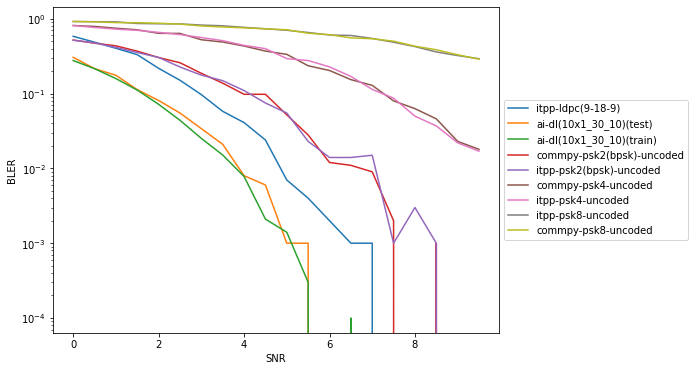

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(10x1_30_10)(test)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(10x1_30_10)(train)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


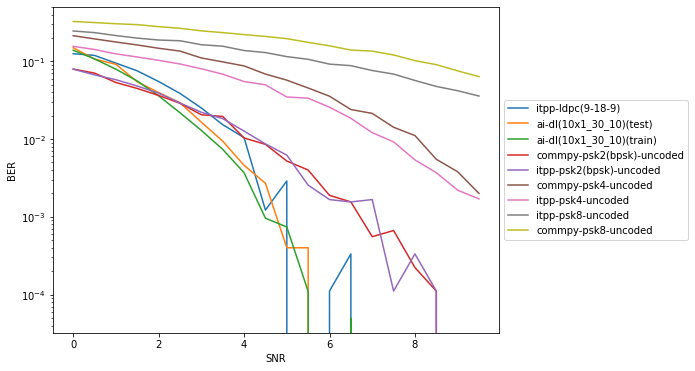

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(10x1_30_10)(test)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(10x1_30_10)(train)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [41]:
print ("ber_per_iter_dl_tensor=[",','.join(str(x) for x in ber_per_iter_dl_tensor), "]")
print ("ber_per_iter_dl_tensor1=[",','.join(str(x) for x in ber_per_iter_dl_tensor1), "]")
print ("ber_per_iter_dl_tensor2=[",','.join(str(x) for x in ber_per_iter_dl_tensor2), "]")
print ("bler_per_iter_dl_tensor=[",','.join(str(x) for x in bler_per_iter_dl_tensor), "]")
print ("bler_per_iter_dl_tensor1=[",','.join(str(x) for x in bler_per_iter_dl_tensor1), "]")
print ("bler_per_iter_dl_tensor2=[",','.join(str(x) for x in bler_per_iter_dl_tensor2), "]")

ber_per_iter_dl_tensor=[ 0.158,0.1225,0.091,0.0625,0.03,0.013,0.006,0.0105,0.0,0.0,0.0055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ]
ber_per_iter_dl_tensor1=[ 0.13898,0.10739,0.07924,0.05589,0.03596,0.02181,0.01293,0.00738,0.00369,0.00096,0.00074,0.00011,0.0,5e-05,0.0,0.0,0.0,0.0,0.0,0.0 ]
ber_per_iter_dl_tensor2=[ 0.1497,0.1069,0.0916,0.0545,0.0397,0.0293,0.0165,0.0094,0.0046,0.0027,0.0004,0.0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ]
bler_per_iter_dl_tensor=[ 0.325,0.255,0.18,0.12,0.065,0.03,0.015,0.025,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ]
bler_per_iter_dl_tensor1=[ 0.277,0.2157,0.1589,0.1115,0.072,0.044,0.0252,0.0151,0.0078,0.0021,0.0014,0.0003,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0 ]
bler_per_iter_dl_tensor2=[ 0.306,0.216,0.176,0.113,0.081,0.055,0.034,0.021,0.008,0.006,0.001,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ]
